In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (10,6)

# 1:
## We have tried to numerically solve the below ODE using a basic shooting method.

# Drought Period

## The ODE we tried to solve was 

## $x'^{2}+xx''+x=0$   from eqn 4.78 in the notes
## With the boundary conditions 
### $X(0)=0$
### $X'(1)=0$
## Re-arranged to get 
## $x'' = \frac{-x-x'^2}{x}$

Text(0.5, 1.0, 'Shooting Method X(x)')

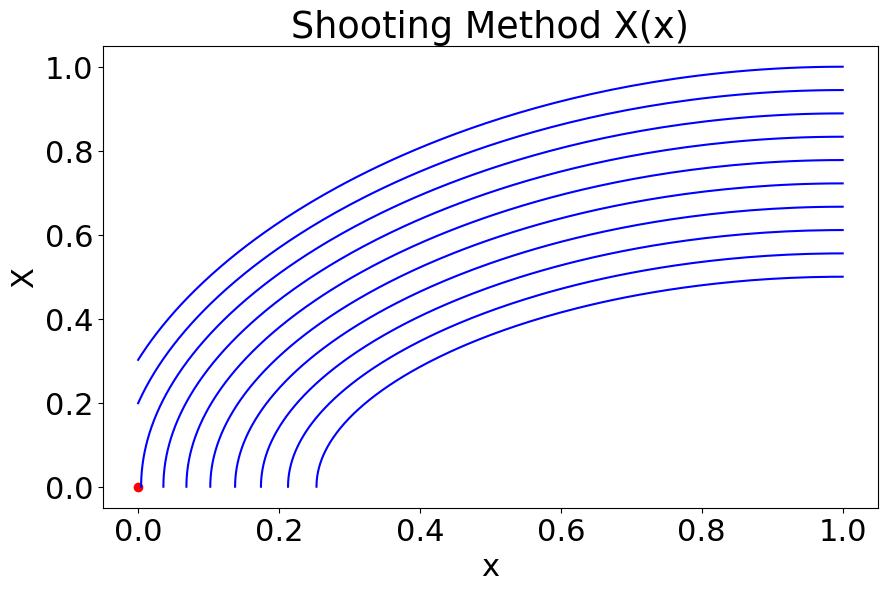

In [7]:
def tester(t,y):
    return [y[1],(-y[0]-y[1]**2)/y[0]]


endvals = np.linspace(0.5,1,10)

for el in endvals:
    sol =solve_ivp(tester,[1,0],[el,0],rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.plot(t,y[0],c='b')
   
plt.scatter(0,0,c='r')
plt.xlabel('x')
plt.ylabel('X')
plt.title('Shooting Method X(x)')

Text(0.5, 1.0, 'Shooting Method X(x)')

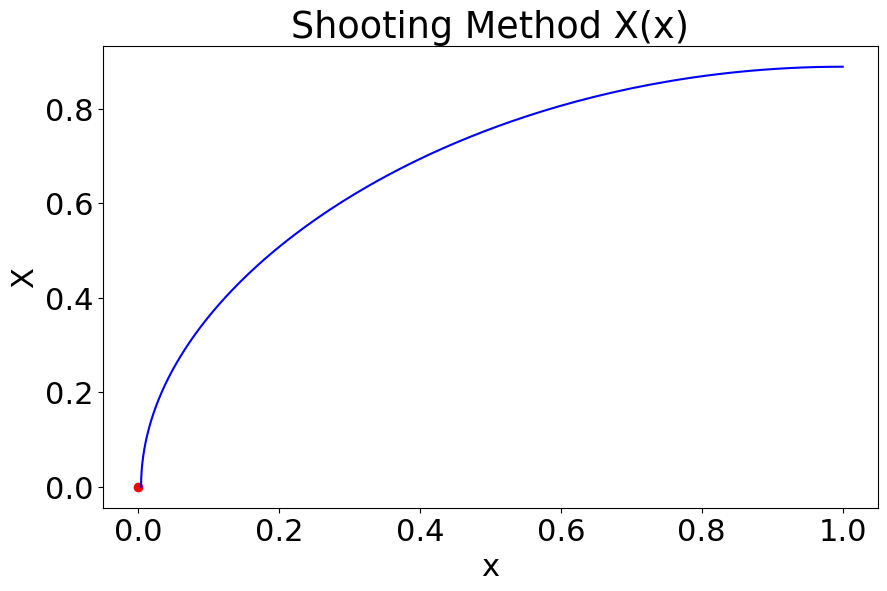

In [8]:
def tester(t,y):
    return [y[1],(-y[0]-y[1]**2)/y[0]]


#endvals = np.linspace(0.5,1,10)
# Best value estimate = 0.889

sol =solve_ivp(tester,[1,0],[0.889,0],rtol=1e-12,atol = 1e-12)
y = sol.y
t = sol.t
plt.plot(t,y[0],c='b')
   
plt.scatter(0,0,c='r')
plt.xlabel('x')
plt.ylabel('X')
plt.title('Shooting Method X(x)')

## The correct value seems to be approximately 0.889 
## $X(1) = 0.889$

## We have from the notes $D = 2\sqrt{X(0)X'(0)} $

In [11]:
D = 2*np.sqrt(y[0][-1]*y[1][-1])
print(f"We have D = {D}")

We have D = 1.65456373677137


## From Notes we have 
## $\hat Q_0 = \frac{-D^2}{2\hat t^2}$   eqn 4.90

In [14]:
A=1
def Q0(t,D):
    return -D**2/(2*t**2+A)

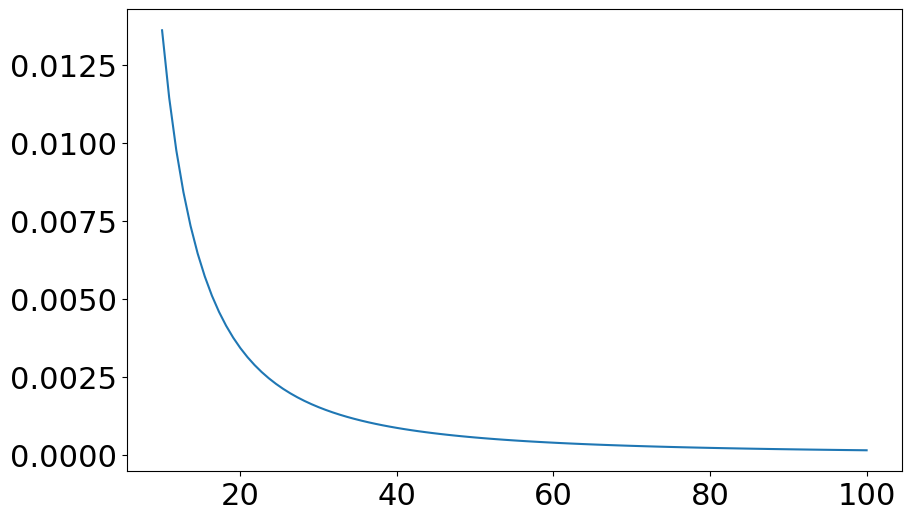

In [15]:
t = np.linspace(10,100,100)
plt.plot(t,np.abs(Q0(t,D)))

# 2: 

## Rainfall

## $f-\eta f' = (ff')'+1$ eqn 4.55
## With Boundary Conditions
### $f(0) = 0 , f(\eta) = 1 $  as $ \eta \rightarrow \infty$

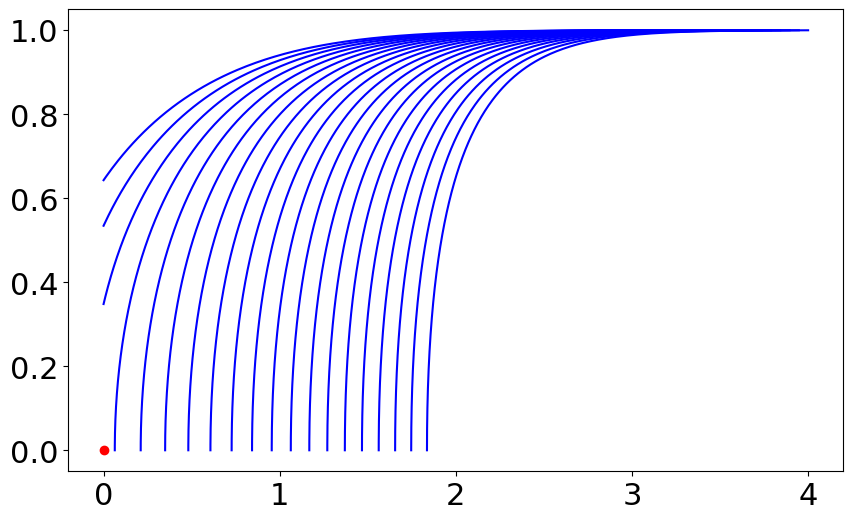

In [20]:
def tester2(t,y):
    return [y[1],(y[0]-t*y[1]-y[1]**2-1)/y[0]]


initderiv = np.linspace(3,4,20)

for el in initderiv:
    sol =solve_ivp(tester2,[el,0],[1,0.001],rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.plot(t,y[0],c='b')

plt.scatter(0,0,c='r')

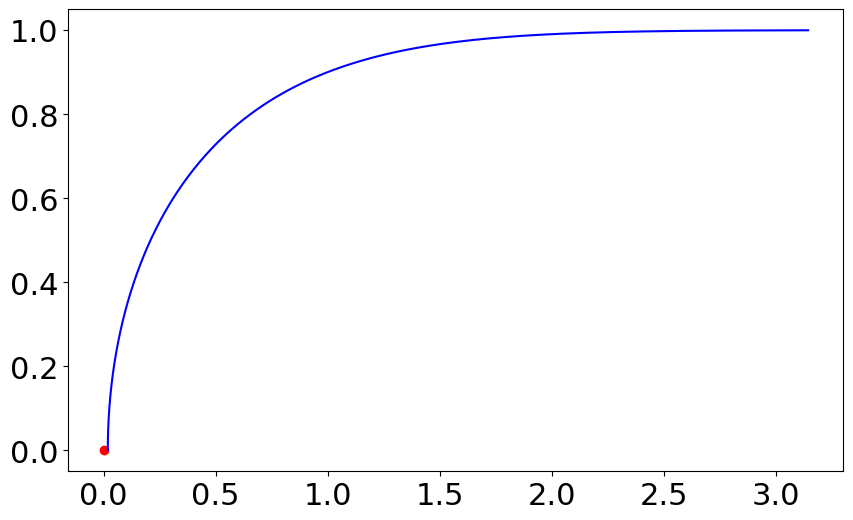

In [21]:
def tester2(t,y):
    return [y[1],(y[0]-t*y[1]-y[1]**2-1)/y[0]]


el = 3.1425

sol =solve_ivp(tester2,[el,0],[1,0.001],rtol=1e-12,atol = 1e-12)
y = sol.y
t = sol.t
plt.plot(t,y[0],c='b')

plt.scatter(0,0,c='r')

## From the notes we have $f(0)f'(0) = \frac{1}{2}C^2$

In [23]:
C = 2*np.sqrt(y[0][-1]*y[1][-1])
print(f"We have that C = {C}")

We have that C = 1.7255355311982647


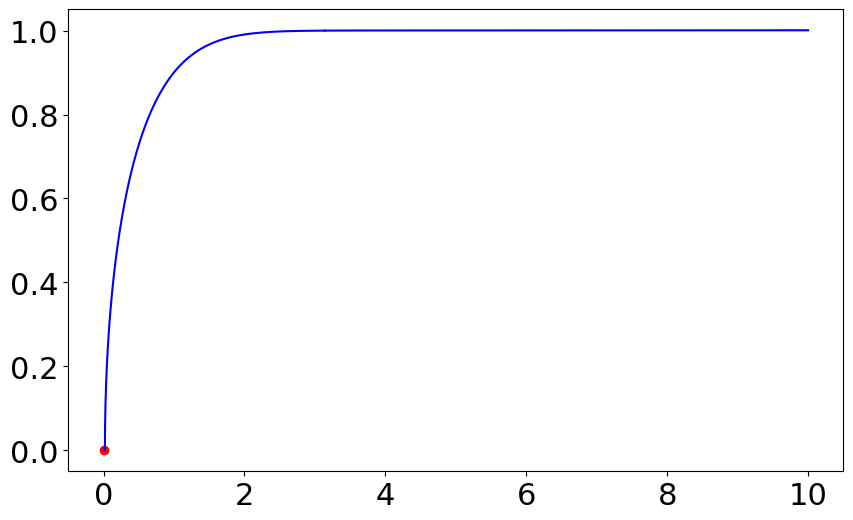

In [24]:
def tester2(t,y):
    return [y[1],(y[0]-t*y[1]-y[1]**2-1)/y[0]]


el = 3.1425

sol =solve_ivp(tester2,[el,0],[1,0.001],rtol=1e-12,atol = 1e-12)
y = sol.y
t = sol.t
plt.plot(t,y[0],c='b')


sol =solve_ivp(tester2,[el,10],[1,0.001],rtol=1e-12,atol = 1e-12)
y = sol.y
t = sol.t
plt.plot(t,y[0],c='b')

plt.scatter(0,0,c='r')

## Flux into the river is given as
## $\hat {Q}_0 = -\hat{t}f(0)f'(0) = \frac{-C^2 \hat t}{2}$    eqn 4.64

In [26]:
A=1
def Q0(t,D):
    return -D**2/(2*t**2+A)

def Q0hat(that,C):
    return -C**2*that/2

Text(0, 0.5, 'Flux')

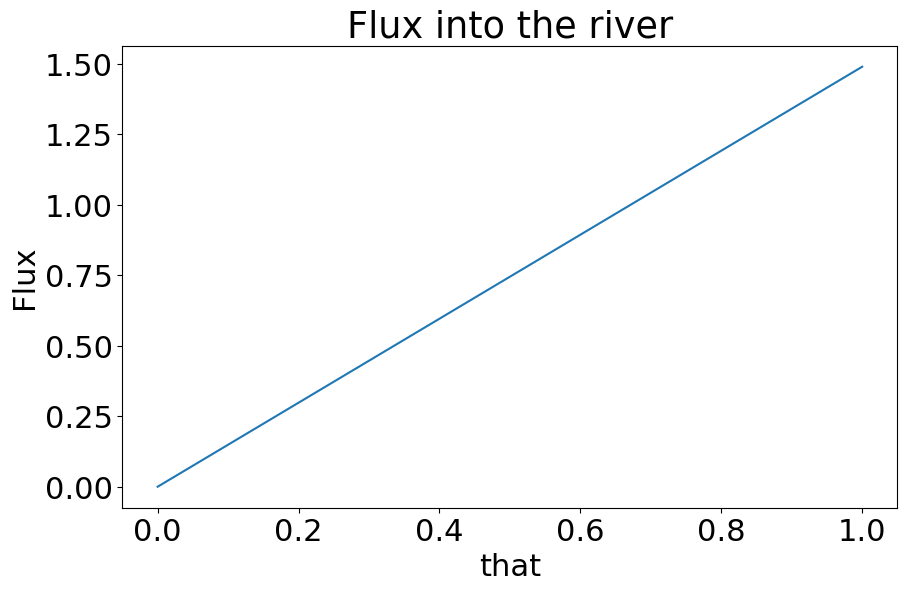

In [27]:
t = np.linspace(0,1,100)
plt.plot(t,np.abs(Q0hat(t,C)))
plt.title('Flux into the river')
plt.xlabel('that')
plt.ylabel('Flux')

## Combining Rainfall and Drought

## We use that the flux with rainfall is 
## $\hat {Q}_0 = -\hat{t}f(0)f'(0) = \frac{-C^2 \hat t}{2}$    eqn 4.64
## $\hat Q_0 = \frac{-D^2}{2\hat t^2}$   eqn 4.90
## Therefore we make these equal to solve for A
## We get $A = \pm \sqrt{(\frac{D^2}{C^2t})}-t$
# We use the absolute value which is very allegede 

In [30]:
D = 1.65456373677137
C = 1.7255355311982647

def Afind(t,C,D):
    return +(np.sqrt(D**2/(C**2*t))-t)

A = Afind(1,C,D)

def QDrought(t,D,A):
    return -D**2/(2*((t+A)**2))

def Qrain(t,C):
    return -C**2*t/2
print(Afind(1,C,D))

-0.041130300213296556


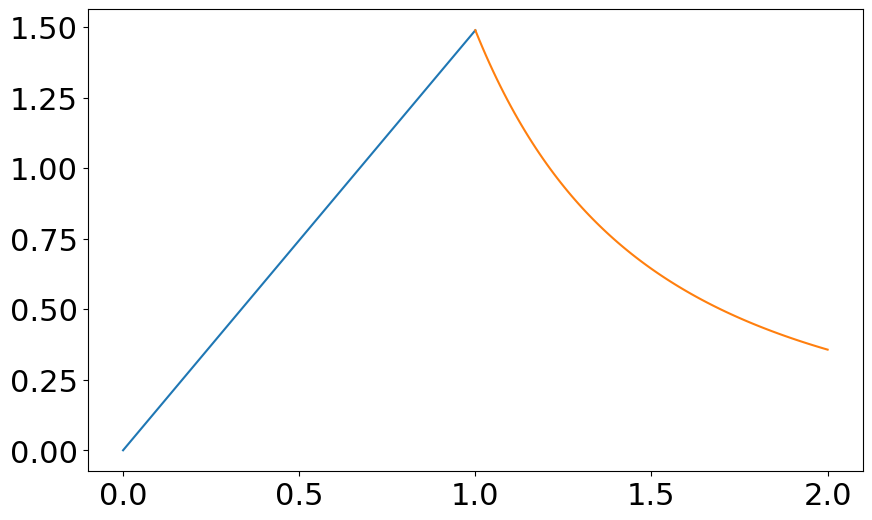

In [32]:
t1 = np.linspace(0,1,100)
t2 = np.linspace(1,2,100)
plt.plot(t1,np.abs(Qrain(t1,C)))
plt.plot(t2,np.abs(QDrought(t2,D,A)))

# Start of Iterating Rain and Drought 
### Wrong

9999


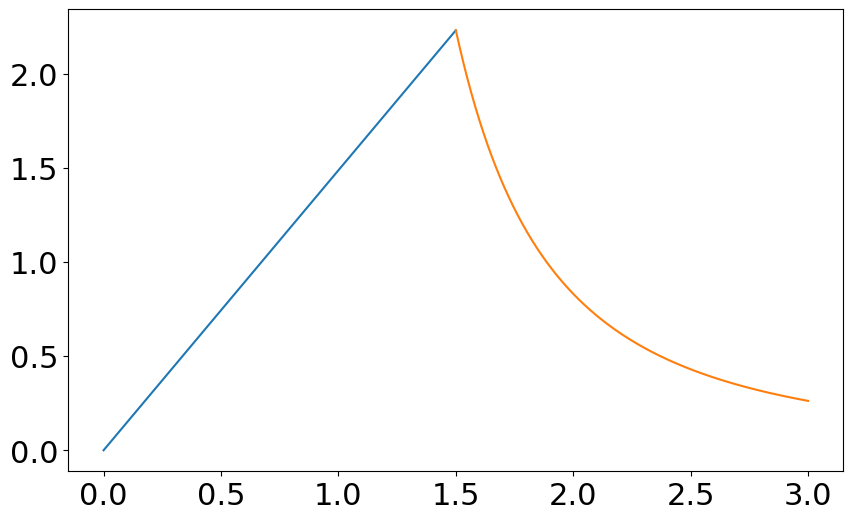

In [38]:
tend1 = 1.5
tend2 = 3
tend3 = 5
t1 = np.linspace(0,tend1,10000)
t2 = np.linspace(tend1,tend2,10000)
t3 = np.linspace(tend2,tend3,10000)
plt.plot(t1,np.abs(Qrain(t1,C)))
plt.plot(t2,np.abs(QDrought(t2,D,Afind(tend1,C,D))))
#plt.plot(t3,np.abs(Qrain(t3,C)))


ytobefound = np.abs(QDrought(t2,D,Afind(tend2,C,D))[-1])
ytobefound

difference_array = np.absolute(np.abs(Qrain(t1,C))-ytobefound)
difference_array
index = difference_array.argmin()
print(index)

plt.plot(t1[:-index]+tend2,np.abs(Qrain(t1[index:],C)))

0.2626382457118531


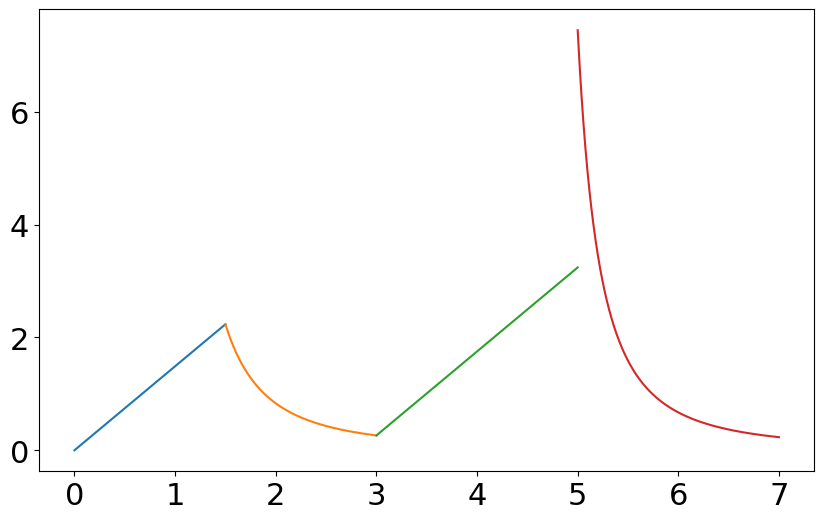

In [39]:
tend1 = 1.5
tend2 = 3
tend3 = 5
tend4 = 7
t1 = np.linspace(0,tend1,1000)
t2 = np.linspace(tend1,tend2,1000)
t3 = np.linspace(tend2,tend3,1000)
t4 = np.linspace(tend3,tend4,1000)
plt.plot(t1,np.abs(Qrain(t1,C)))
plt.plot(t2,np.abs(QDrought(t2,D,Afind(tend1,C,D))))
#plt.plot(t3,np.abs(Qrain(t3,C)))


ytobefound = np.abs(QDrought(t2,D,Afind(tend1,C,D))[-1])
ytobefound
print(ytobefound)

def Qrain2(t,C,ytobefound):
    val = np.abs(-C**2*t/2)
    dif = val[0] - ytobefound
    return val-dif
    
A2 = Afind(tend3,C,D)

plt.plot(t3,Qrain2(t3,C,ytobefound))
#plt.plot(t3,Qrain(t3,C))
plt.plot(t4,(np.abs(QDrought(t4,D,A2))))

# Taking in Data

## We are plotting discharge

## further details here https://data.usgs.gov/datacatalog/data/USGS:5dcd62fae4b069579760aedd

## There are 5 different data sets

In [44]:
import pandas as pd

In [47]:
excel_file=pd.ExcelFile('hyrdodata.xlsx')
df=pd.read_excel(excel_file, sheet_name="figure 2_unit_hydrograph")

print("The dataframe is:")
print(df)
df.head()

The dataframe is:
      Site number   Time  peakAvg_start  SD_start  SD_start_plus  \
0         1644280   0.00       0.018356  0.026422       0.044778   
1         1644280   0.25       0.019024  0.023623       0.042647   
2         1644280   0.50       0.018676  0.021166       0.039842   
3         1644280   0.75       0.022201  0.028599       0.050799   
4         1644280   1.00       0.028967  0.042048       0.071015   
...           ...    ...            ...       ...            ...   
1726     12090500  19.00       0.577318  0.000000       0.577318   
1727     12090500  19.25       0.534677  0.000000       0.534677   
1728     12090500  19.50       0.492036  0.000000       0.492036   
1729     12090500  19.75       0.449395  0.000000       0.449395   
1730     12090500  20.00       0.406754  0.000000       0.406754   

      SD_start_minus  peakAvg_end    SD_end  SD_end_plus  SD_end_minus  
0           0.000000     0.009701  0.010620     0.020321           0.0  
1           0.00000

,Site number,Time,peakAvg_start,SD_start,SD_start_plus,SD_start_minus,peakAvg_end,SD_end,SD_end_plus,SD_end_minus
0,1644280,0.00,0.018356,0.026422,0.044778,0.0,0.009701,0.010620,0.020321,0.0
1,1644280,0.25,0.019024,0.023623,0.042647,0.0,0.014844,0.021623,0.036467,0.0
2,1644280,0.50,0.018676,0.021166,0.039842,0.0,0.024439,0.025902,0.050341,0.0
3,1644280,0.75,0.022201,0.028599,0.050799,0.0,0.039733,0.041440,0.081173,0.0
4,1644280,1.00,0.028967,0.042048,0.071015,0.0,0.052109,0.058707,0.110816,0.0


In [50]:
D = 1.65456373677137
C = 1.7255355311982647

def Afind(t,C,D):
    return +(np.sqrt(D**2/(C**2*t))-t)

A = Afind(1,C,D)

def QDrought(t,D,A):
    return -D**2/(2*((t+A)**2))

def Qrain(t,C):
    return -C**2*t/2
print(Afind(1,C,D))

-0.041130300213296556


In [53]:
t = df["Time"][:373]
avgstart = df["peakAvg_start"][:373]

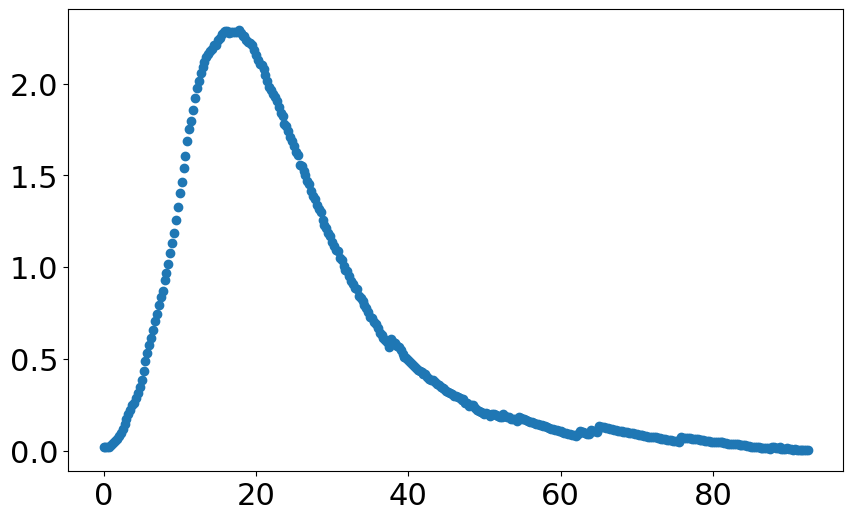

In [56]:
plt.scatter(t,avgstart)
tend1 = 20
tend2 = 80
t1 = np.linspace(0,tend1,100)
t2 = np.linspace(tend1,tend2,100)
#plt.plot(t1,np.abs(Qrain(t1,C)))
#plt.plot(t2,np.abs(QDrought(t2,D,Afind(tend1,C,D))))

In [59]:
t = df["Time"][485:650]
avgstart = df["peakAvg_start"][485:650]

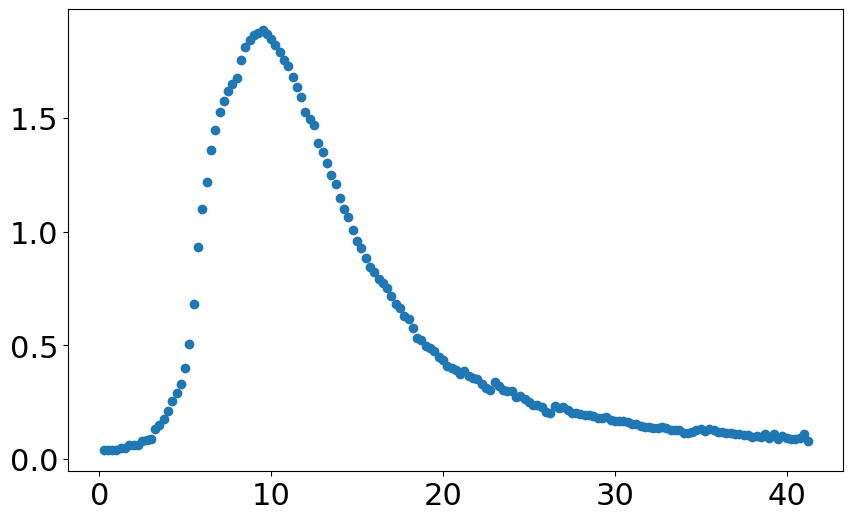

In [60]:
plt.scatter(t,avgstart)

In [71]:
t = df["Time"][784:1100]
avgstart = df["peakAvg_start"][784:1100]

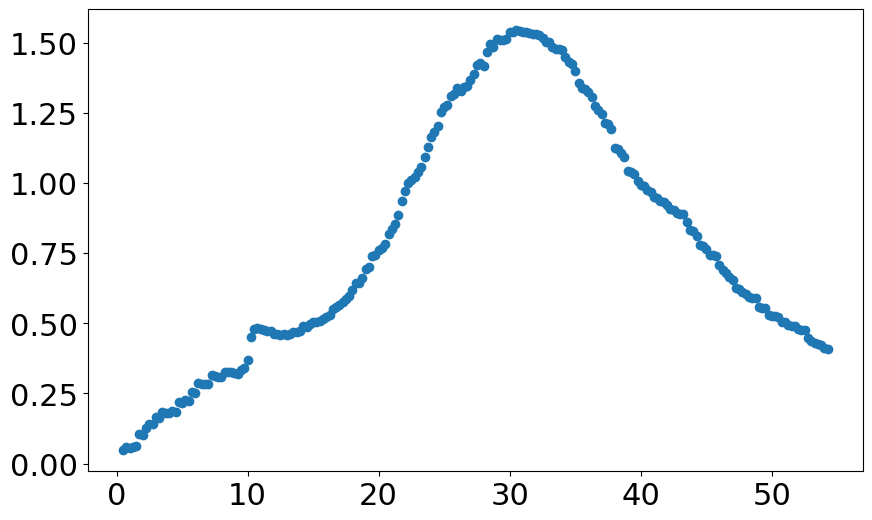

In [69]:
plt.scatter(t,avgstart)

In [785]:
t = df["Time"][1124:1560]
avgstart = df["peakAvg_start"][1124:1560]

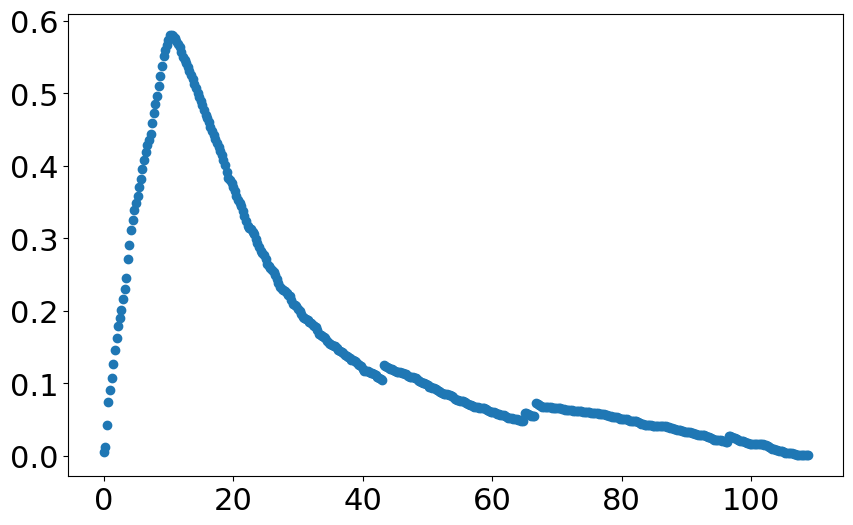

In [787]:
plt.scatter(t,avgstart)

In [789]:
t = df["Time"][1561:1651]
avgstart = df["peakAvg_start"][1561:1651]

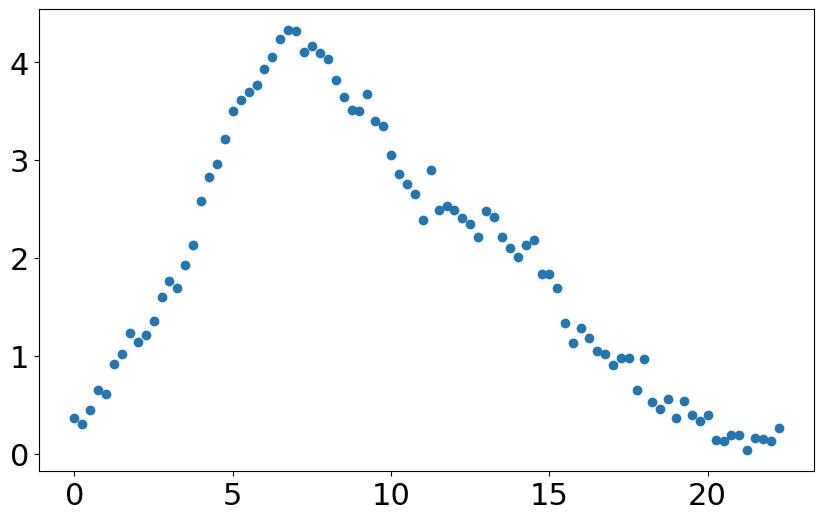

In [791]:
plt.scatter(t,avgstart)

In [793]:
t = df["Time"][1652:]
avgstart = df["peakAvg_start"][1652:]

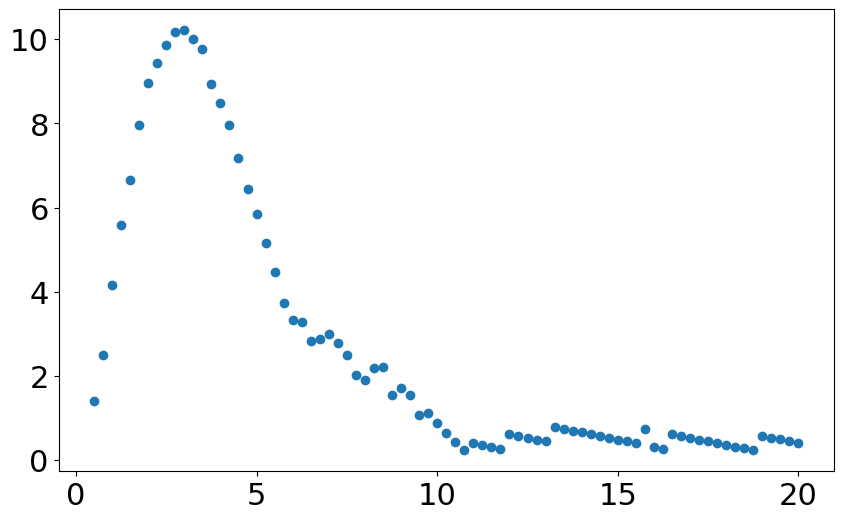

In [795]:
plt.scatter(t,avgstart)

# Re-dim so Allegede

In [934]:
D = 1.65456373677137
C = 1.7255355311982647

k = 10**(-2)

mu = 10**(-3)

rho = 1020

phi = 0.4

L = 5*10**3

H = 9.05
 
g = 9.81


U = (k*rho*g*H)/(mu*L)

#def U(H):
#   return (k*rho*g*H)/(mu*L)

tau = phi*L/U

#def tau(U):
#    return phi*L/U 
#print(U)

def Afindredim(t,C,D):
    return +(np.sqrt(D**2*tau/(C**2*t))-t/tau)


def QDroughtredim(t,D,A):
    return -D**2/(2*(t/tau+A)**2)

def Qrainredim(t,C):
    return -C**2/2*(t/tau)


print(Afindredim(20,C,D))

-1.0986208063417173


0       0.00
1       0.25
2       0.50
3       0.75
4       1.00
       ...  
368    92.00
369    92.25
370    92.50
371    92.75
372    93.00
Name: Time, Length: 373, dtype: float64
[2.3929517  2.06959367 1.80760993 1.59239693 1.41344969 1.26305512
 1.13544675 1.02624362 0.93206917 0.85028709 0.77881477 0.71598941
 0.66047039 0.61116719 0.5671854  0.52778588 0.49235353 0.46037306
 0.43141023 0.40509699 0.38111975 0.35920995 0.33913657 0.32069996
 0.3037269  0.28806648 0.27358676 0.26017195 0.24772014 0.23614132
 0.22535574 0.21529256 0.20588869 0.19708777 0.18883932 0.18109805
 0.17382323 0.16697811 0.16052952 0.15444739 0.14870449 0.14327605
 0.13813951 0.13327433 0.12866172 0.12428449 0.12012689 0.11617448
 0.11241398 0.10883315 0.10542073 0.10216632 0.09906031 0.09609383
 0.09325863 0.09054707 0.08795209 0.08546708 0.08308591 0.08080289
 0.0786127  0.07651036 0.07449124 0.072551   0.07068559 0.06889122
 0.06716431 0.06550153 0.06389975 0.062356   0.06086754 0.05943174
 0.05804615 0

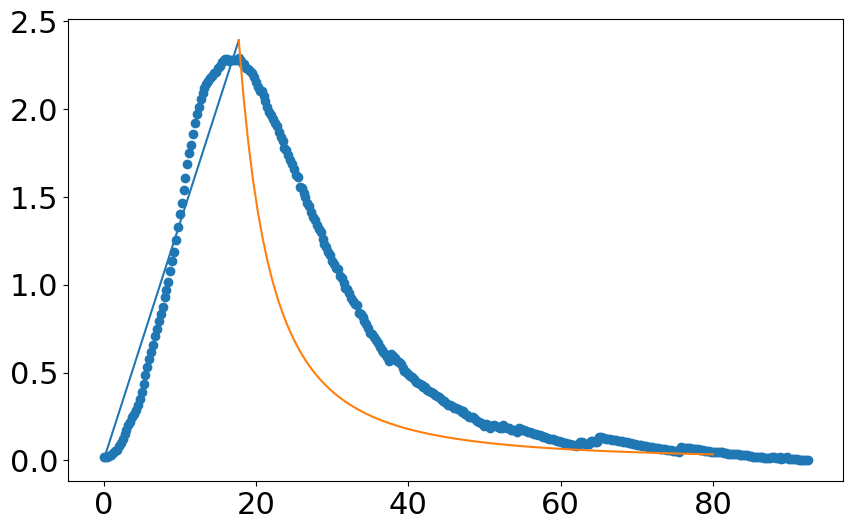

In [936]:
#plt.scatter(t,avgstart)
tend1 = 17.75
tend2 = 80

t = df["Time"][:373]
avgstart = df["peakAvg_start"][:373]

print(t)


t1 = np.linspace(0,tend1,100)
t2 = np.linspace(tend1,tend2,100)
plt.plot(t1,np.abs(Qrainredim(t1,C)))
plt.plot(t2,np.abs(QDroughtredim(t2,D,Afindredim(tend1,C,D))))

print(np.abs(QDroughtredim(t2,D,Afindredim(tend1,C,D))))
plt.scatter(t,avgstart)

#### First I want a function that can find the time when it rains and then stops raining

In [939]:
def split_t(time,flux):
    maxflux = flux.max()           
    maxindex = flux.idxmax() 
    #print(maxt,maxindex)
    t1 = time[:maxindex+1]
    t2 = time[maxindex:]
    t1 = t1.to_numpy()
    t2 = t2.to_numpy()
    return t1,t2

#### Now have 2 arrays giving out t1 array of time where raining and t2 array of time not raining

In [942]:
t = df["Time"][:373]
avgstart = df["peakAvg_start"][:373]

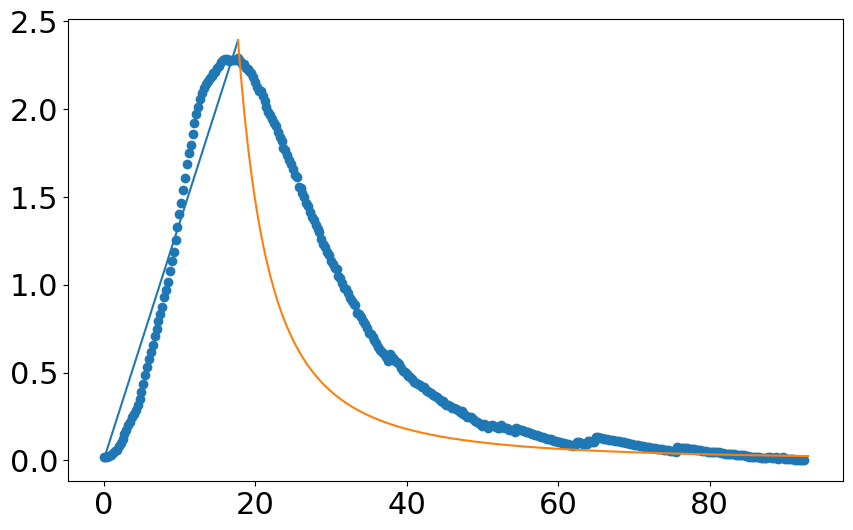

In [944]:
t1,t2 = split_t(t,avgstart)
plt.plot(t1,np.abs(Qrainredim(t1,C)))
plt.plot(t2,np.abs(QDroughtredim(t2,D,Afindredim(t1[-1],C,D))))
plt.scatter(t,avgstart)

## Now making a function to get all the data. The flux with rain with drought and t1 and t2

In [947]:
D = 1.65456373677137
C = 1.7255355311982647

k = 10**(-2)

mu = 10**(-3)

rho = 1020

phi = 0.4

L = 5*10**3
#L = 550*H

#H = 9.05
 
g = 9.81

In [949]:
t = df["Time"][:144]
avgstart = df["peakAvg_start"][:144]

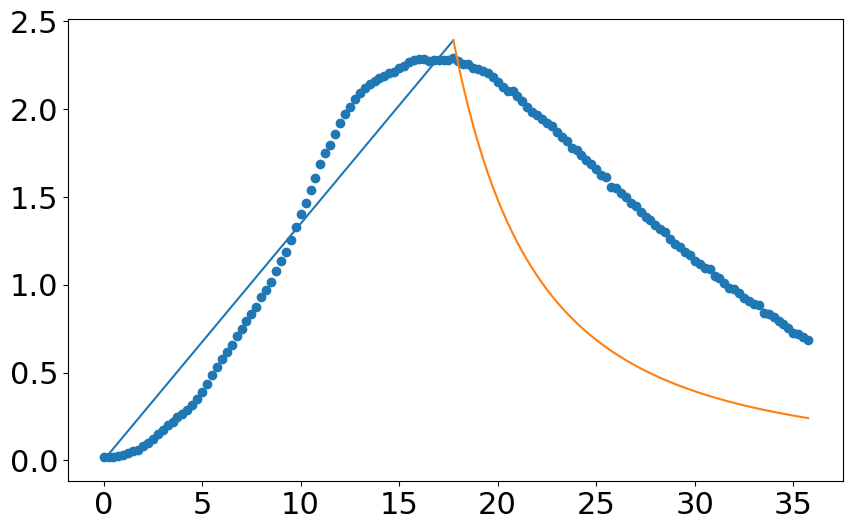

In [951]:
def Flux(t,fluxdata,H):
    U = (k*rho*g*H)/(mu*L)
    tau = phi*L/U
    t1,t2 = split_t(t,fluxdata)
    A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    Qrain = -C**2/2*(t1/tau)
    Qdrought = -D**2/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H)

plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)

## Now make a L2 norm function which I will minimise to find the best H

In [954]:
t = df["Time"][:372]
avgstart = df["peakAvg_start"][:372]

In [956]:
def split_t(time,flux):
    maxflux = flux.max()           
    maxindex = flux.idxmax() 
    #print(maxt,maxindex)
    t1 = time[:maxindex+1]
    t2 = time[maxindex:]
    t1 = t1.to_numpy()
    t2 = t2.to_numpy()
    return t1,t2

In [958]:
def Flux(t,fluxdata,H):
    U = (k*rho*g*H)/(mu*L)
    tau = phi*L/U
    t1,t2 = split_t(t,fluxdata)
    A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    Qrain = -C**2/2*(t1/tau)
    Qdrought = -D**2/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

In [960]:
def L2norm(H,t,fluxdata,t1testinterval,t2testinterval):
    Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H)  
    #print(t1points)
    dif1 = 0
    dif2 = 0
    i = 0
    while (i<len(t1)):
        dif1 += np.abs(Qrain[i]-avgstart[i])
        i += t1testinterval
    i = 0  
    while (i<len(t2)):
        dif2 += np.abs(Qdrought[i]-avgstart[i])
        i += t2testinterval
    diftotal = dif1+dif2
    return diftotal
L2norm(H,t,avgstart,1,2)

120.69809291816955

In [962]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = 5 

# FixME use ML algorithm to minimise

result = minimize(L2norm, initial_param, args=(t,avgstart,1,2), method="L-BFGS-B")
H = result.x[0]
print(H)

8.871894125659475


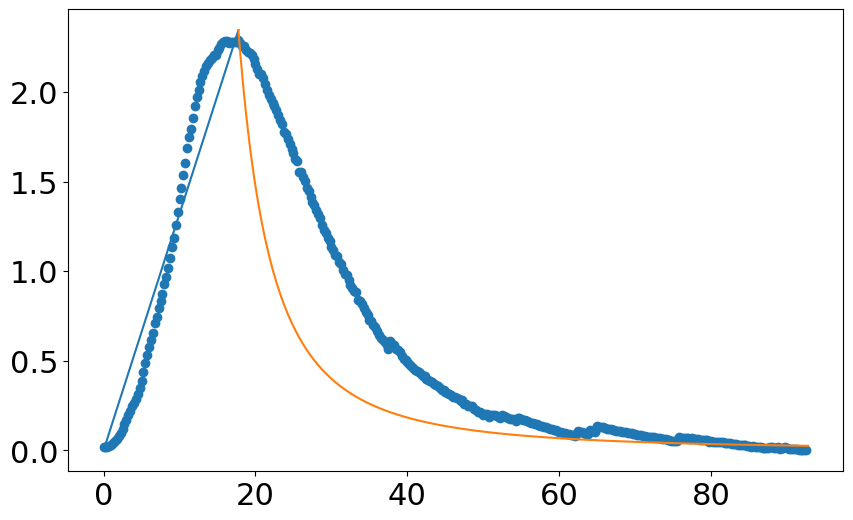

In [964]:
Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H)

plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)

## Revert back to start finding C and D
## Have to come up with a root finding function to find best boundary

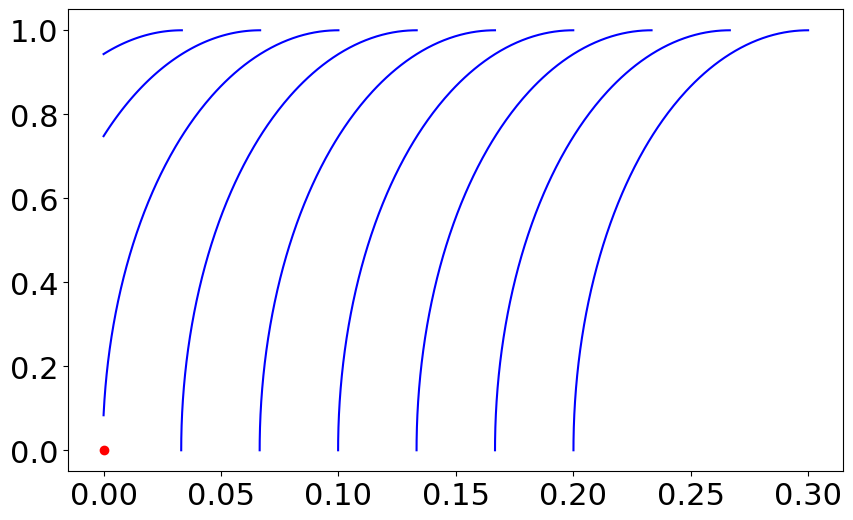

In [967]:
def tester2(t,y,R):
    return [y[1],(y[0]-t*y[1]-y[1]**2-R)/y[0]]


initderiv = np.linspace(0,0.3,10)

R = 100

for el in initderiv:
    sol =solve_ivp(tester2,[el,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.plot(t,y[0],c='b')

plt.scatter(0,0,c='r')

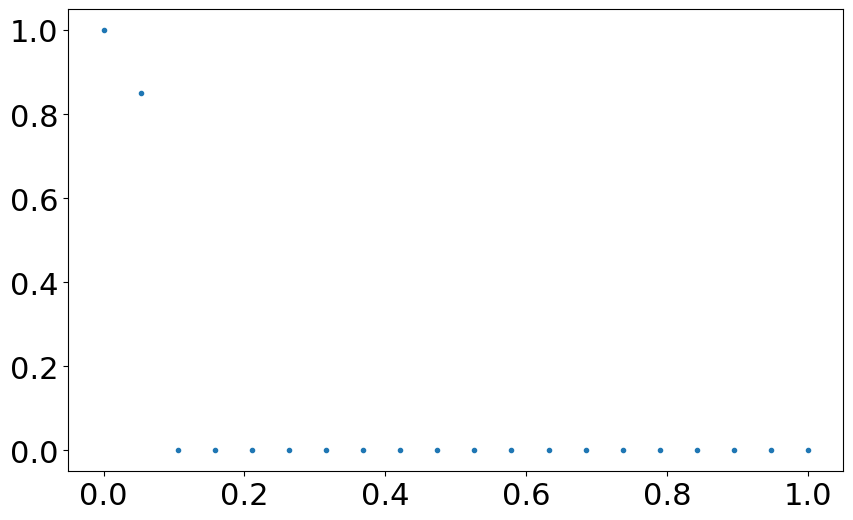

In [969]:
initderiv = np.linspace(0,1,20)
yx1 = np.array([])
for el in initderiv:
    sol =solve_ivp(tester2,[el,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
    t = sol.t
    yx1 = np.append(yx1,sol.y[0][-1])

plt.plot(initderiv,yx1,'.')

In [971]:
tol = 10e-6
i=0
while (i<len(initderiv)):
    if (yx1[i]<=tol):
        boundary = initderiv[i]
        break
    i+=1

In [973]:
def f(R):
    initderiv = np.linspace(0,0.3,500)
    yx1 = np.array([])
    for el in initderiv:
        sol =solve_ivp(tester2,[el,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
        t = sol.t
        yx1 = np.append(yx1,sol.y[0][-1])
    tol = 10e-4
    i=0
    while (i<len(initderiv)):
        if (yx1[i]<=tol):
            boundary = initderiv[i]
            break
        i+=1
    sol =solve_ivp(tester2,[boundary,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.figure()
    plt.plot(t,y[0],c='b')
    plt.scatter(0,0,c='r')
    #plt.title('boundary = %.2f and %.2f'%(boundary,R))
    C = y[0][-1]*y[1][-1]
    print(C,boundary)
    return C,boundary

14.12703726683139 0.07094188376753506


(14.12703726683139, 0.07094188376753506)

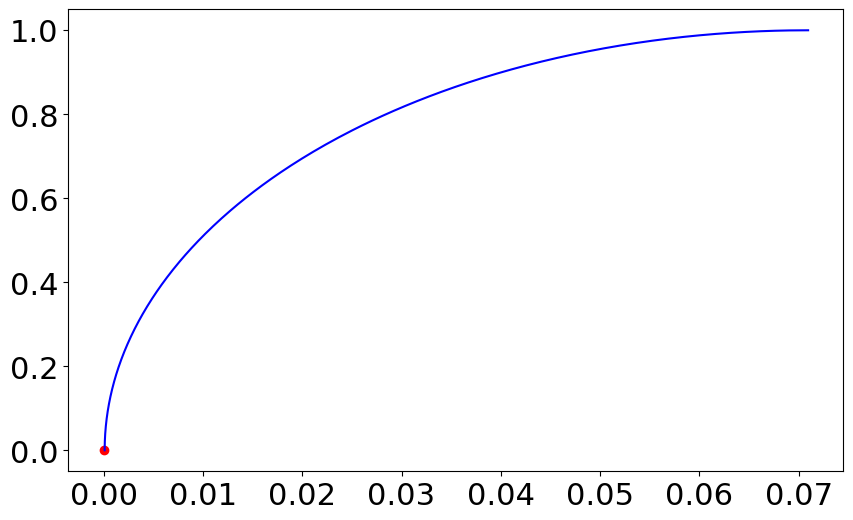

In [975]:
RainfallRate = 200
f(RainfallRate)

## Just allegede messing with C which we have to parameter search which takes into acc Amount of Rainfall

In [1335]:
D = 1.65456373677137
#C = 1.7255355311982647 inital val
#C = 3.08  # works well
C = 2.5   # ok aswell
#C = 3.1

k = 10**(-2)

mu = 10**(-3)

rho = 1020

phi = 0.4

L = 5*10**3
#L = 550*H

#H = 9.05
 
g = 9.81

In [1337]:
t = df["Time"][:372]
avgstart = df["peakAvg_start"][:372]

In [1339]:
def Flux(t,fluxdata,H,C):
    U = (k*rho*g*H)/(mu*L)
    tau = phi*L/U
    t1,t2 = split_t(t,fluxdata)
    A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    Qrain = -C**2/2*(t1/tau)
    Qdrought = -D**2/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

In [1341]:
def L2norm(H,C,t,fluxdata,t1testinterval,t2testinterval):
    Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,C)  
    #print(t1points)
    dif1 = 0
    dif2 = 0
    i = 0
    while (i<len(t1)):
        dif1 += np.abs(Qrain[i]-avgstart[i])
        i += t1testinterval
    i = 0  
    while (i<len(t2)):
        dif2 += np.abs(Qdrought[i]-avgstart[i])
        i += t2testinterval
    diftotal = dif1+dif2
    return diftotal
L2norm(H,C,t,avgstart,1,2)

102.11565200147774

In [1343]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = 5 

# FixME use ML algorithm to minimise

result = minimize(L2norm, initial_param, args=(C,t,avgstart,1,2), method="L-BFGS-B")
H = result.x[0]
print(H)

4.126357835591429


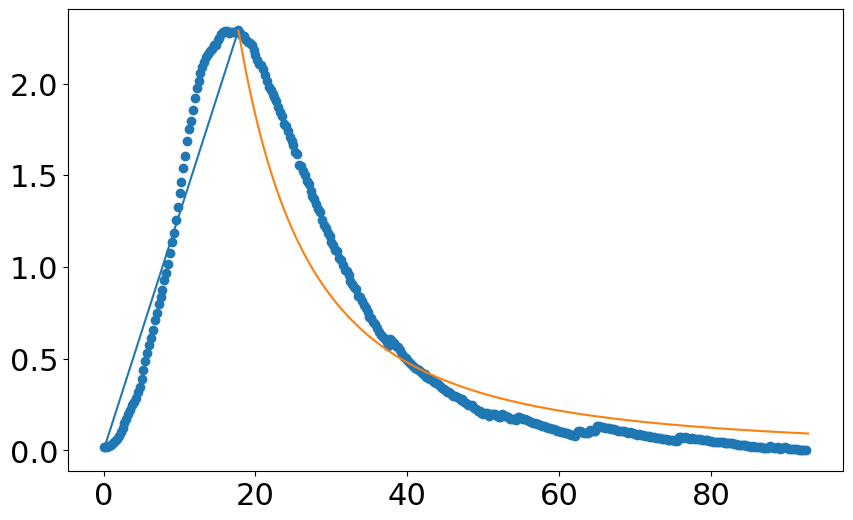

In [1345]:
Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,C)

plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)